# Clustering sobre Venta de Videojuegos

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

/home/mferreyra/.virtualenvs/diplodatos-ans/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
PATH_VG = '../../Datasets/vgsales.csv'

df = pd.read_csv(PATH_VG, index_col=['Rank'])

In [4]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [5]:
df.shape

(16598, 10)

In [6]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df.describe(include='all')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [8]:
df.dropna().shape

(16291, 10)

In [9]:
df = df.dropna()

In [10]:
df.shape

(16291, 10)

In [11]:
min_year = df.Year.min()
max_year = df.Year.max()

print("Min Year =", min_year)
print("Max Year =", max_year)
print()
print("Max - Min Year =", max_year - min_year)

Min Year = 1980.0
Max Year = 2020.0

Max - Min Year = 40.0


In [12]:
df = df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [13]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62


In [14]:
le_name = LabelEncoder()  # Create a label (category) encoder object
le_name.fit(df['Name'])  # Fit the encoder to the pandas column

# View encoder mapping
#print(dict(zip(le_name.classes_, le_name.transform(le_name.classes_))))

print("=" * 79)

le_platform = LabelEncoder()  # Create a label (category) encoder object
le_platform.fit(df['Platform'])  # Fit the encoder to the pandas column

# View encoder mapping
print(dict(zip(le_platform.classes_, le_platform.transform(le_platform.classes_))))

print("=" * 79)

le_genre = LabelEncoder()  # Create a label (category) encoder object
le_genre.fit(df['Genre'])  # Fit the encoder to the pandas column

# View encoder mapping
print(dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_))))

print("=" * 79)

le_publisher = LabelEncoder()  # Create a label (category) encoder object
le_publisher.fit(df['Publisher'])  # Fit the encoder to the pandas column

# View encoder mapping
#print(dict(zip(le_publisher.classes_, le_publisher.transform(le_publisher.classes_))))

{'2600': 0, '3DO': 1, '3DS': 2, 'DC': 3, 'DS': 4, 'GB': 5, 'GBA': 6, 'GC': 7, 'GEN': 8, 'GG': 9, 'N64': 10, 'NES': 11, 'NG': 12, 'PC': 13, 'PCFX': 14, 'PS': 15, 'PS2': 16, 'PS3': 17, 'PS4': 18, 'PSP': 19, 'PSV': 20, 'SAT': 21, 'SCD': 22, 'SNES': 23, 'TG16': 24, 'WS': 25, 'Wii': 26, 'WiiU': 27, 'X360': 28, 'XB': 29, 'XOne': 30}
{'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Misc': 3, 'Platform': 4, 'Puzzle': 5, 'Racing': 6, 'Role-Playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Strategy': 11}


LabelEncoder()

In [15]:
df['Name'] = le_name.transform(df['Name'])  # Encondeamos la columna 'Name'
df['Platform'] = le_platform.transform(df['Platform'])  # Encondeamos la columna 'Platform'
df['Genre'] = le_genre.transform(df['Genre'])  # Encondeamos la columna 'Genre'
df['Publisher'] = le_publisher.transform(df['Publisher'])  # Encondeamos la columna 'Publisher'

In [16]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,,
1,10849,26,2006.0,10,359,82.74
2,9201,11,1985.0,4,359,40.24
3,5493,26,2008.0,6,359,35.82
4,10851,26,2009.0,10,359,33.00
5,7247,5,1996.0,7,359,31.37
6,9581,5,1989.0,5,359,30.26
7,6632,4,2006.0,4,359,30.01
8,10847,26,2006.0,3,359,29.02
9,6635,26,2009.0,4,359,28.62


In [17]:
# https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

#Make a copy of DF
df_tr = df

In [18]:
df_array = df.values

In [19]:
df_array[:5]

array([[1.0849e+04, 2.6000e+01, 2.0060e+03, 1.0000e+01, 3.5900e+02,
        8.2740e+01],
       [9.2010e+03, 1.1000e+01, 1.9850e+03, 4.0000e+00, 3.5900e+02,
        4.0240e+01],
       [5.4930e+03, 2.6000e+01, 2.0080e+03, 6.0000e+00, 3.5900e+02,
        3.5820e+01],
       [1.0851e+04, 2.6000e+01, 2.0090e+03, 1.0000e+01, 3.5900e+02,
        3.3000e+01],
       [7.2470e+03, 5.0000e+00, 1.9960e+03, 7.0000e+00, 3.5900e+02,
        3.1370e+01]])

In [32]:
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

In [33]:
km.fit(df)
#km.fit(df_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
clusters = km.labels_.tolist()

print(len(clusters))
print(clusters[:100])

# Recuento del número de elementos en cada cluster
for i in range(n_clusters):
    print('El cluster {} tiene {} elementos'.format(i, clusters.count(i)))

16291
[2, 2, 4, 2, 0, 2, 4, 2, 4, 3, 4, 4, 0, 2, 2, 4, 3, 3, 2, 1, 0, 2, 2, 3, 3, 0, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 4, 3, 3, 0, 2, 3, 2, 0, 2, 3, 3, 2, 3, 1, 3, 2, 0, 2, 4, 1, 3, 4, 4, 3, 3, 1, 4, 3, 1, 3, 4, 1, 4, 2, 2, 3, 2, 3, 4, 0, 3, 2, 3, 4, 3, 3, 0, 0, 3, 2, 0, 1, 2, 1, 2, 2, 1, 1]
El cluster 0 tiene 3207 elementos
El cluster 1 tiene 3240 elementos
El cluster 2 tiene 3262 elementos
El cluster 3 tiene 3132 elementos
El cluster 4 tiene 3450 elementos


In [35]:
#Glue back to originaal data
df_tr['clusters'] = clusters

#Add the column into our list
#clmns.extend(['clusters'])

display(df_tr.head(10))
df_tr_gb = df_tr.groupby('clusters')

#Lets analyze the clusters
#print df_tr[clmns].groupby(['clusters']).mean()

,Name,Platform,Year,Genre,Publisher,Global_Sales,clusters
Rank,,,,,,,
1,10849,26,2006.0,10,359,82.74,2
2,9201,11,1985.0,4,359,40.24,2
3,5493,26,2008.0,6,359,35.82,4
4,10851,26,2009.0,10,359,33.00,2
5,7247,5,1996.0,7,359,31.37,0
6,9581,5,1989.0,5,359,30.26,2
7,6632,4,2006.0,4,359,30.01,4
8,10847,26,2006.0,3,359,29.02,2
9,6635,26,2009.0,4,359,28.62,4


In [36]:
gb = df_tr_gb.groups

#for key, values in gb.items():
#    print(df.loc[values])

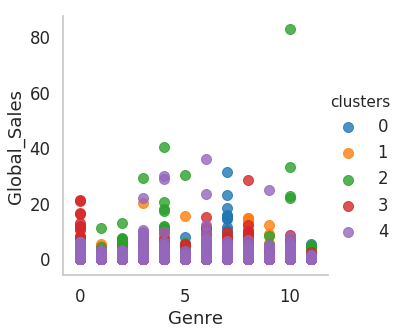

In [37]:
#Scatter plot of id_equipo and id_tanque

#sns.lmplot(x='Global_Sales', y='Genre', data=df_tr, fit_reg=False, hue="clusters", scatter_kws={"marker": "D", "s": 100})
sns.lmplot(x='Genre', y='Global_Sales', data=df_tr, fit_reg=False, hue="clusters", scatter_kws={"marker": "D", "s": 100})
plt.grid()

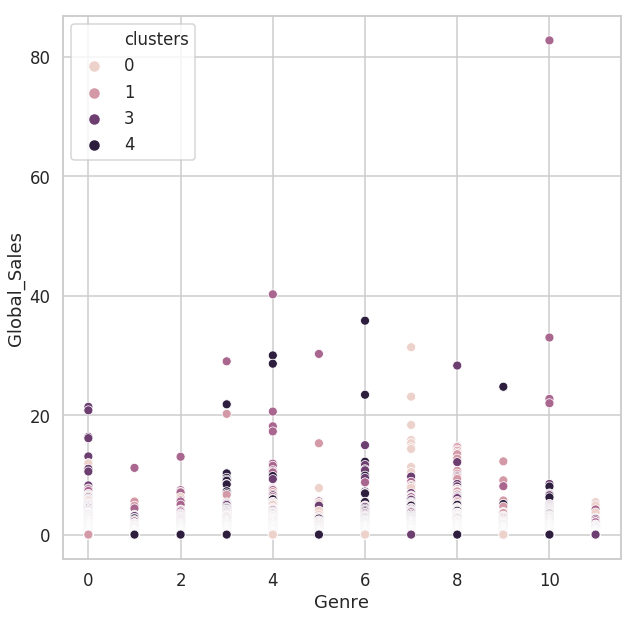

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax2 = sns.scatterplot(x='Genre', y='Global_Sales', hue='clusters', data=df_tr, ax=ax)